## **Twitter Data Analysis using Tweepy**

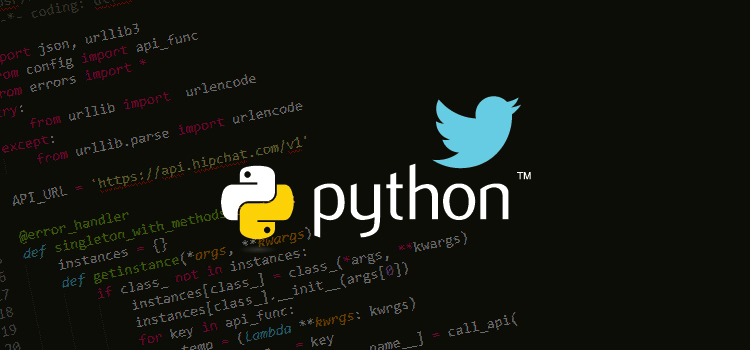

In [253]:
#import tweepy
import tweepy as tw

#Twitter API key and API secret
my_api_key = "K098MNRcmZqCJAUH6lmgeEUvn"
my_api_secret = "8g2OSrn6e5ps8lukJJ2IascVA7i3aPFqzlDGF9NCaT1a52WjsG"


In [254]:
#authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### **Part 1: Extract and summarize twitter hashtags**

In [255]:
#search for a hashtag with filter
search_query = "#covid19 -filter:retweets"

In [256]:
# get 50 tweets from the API using Tweepy cursor
tweets = tw.Cursor(api.search,
              q=search_query,
              lang="en",
              since="2020-09-16").items(50)
              
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 50


In [257]:
import pandas as pd
# intialize the dataframe
tweets_df = pd.DataFrame()



In [258]:
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

In [259]:
# show the dataframe
tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,Peter Clarke,"Melbourne, Wurundjeri Land.",Former ABC broadcast journalist. Pioneered Aus...,False,2022-04-22 21:42:29,OPINION @murpharoo “if you want the campaign t...,None,Twitter for iPad
1,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,False,2022-04-22 21:42:08,Daily Covid Deaths per 1K Population by County...,None,smcapplication
2,علي علي الانصاري,,‏أحد أنصار الإمام المهدي المنتظر ناصر محمد الي...,False,2022-04-22 21:42:06,and upon the upper assembly till the Day of Ju...,None,Twitter for Android
3,NCES,US Department of Education,The National Center for Education #Statistics ...,True,2022-04-22 21:42:03,"It’s nice to see you all in-person again, #AER...",[AERA22],Sprout Social
4,Royal Australian College of GPs (RACGP) President,,The official account of the @RACGP President D...,False,2022-04-22 21:41:42,Congratulations to @RACGP WA spokesperson and ...,None,Twitter for iPhone


In [261]:
tweets_df['user_verified']. value_counts()

False    44
True      6
Name: user_verified, dtype: int64

In [262]:
tweets_df.isnull().sum()

user_name            0
user_location        0
user_description     0
user_verified        0
date                 0
text                 0
hashtags            25
source               0
dtype: int64

In [263]:
tweets_df.source.value_counts()

Twitter for Android    12
Twitter Web App        12
smcapplication          6
Twitter for iPhone      4
Twitter for iPad        2
Sprout Social           2
Hootsuite Inc.          2
TweetDeck               2
Gain Platform           1
corona-tracker-app      1
HN_Comments             1
Cloud Campaign          1
SACoronaTracker         1
coronaData_Test         1
Buffer                  1
webmedyApp              1
Name: source, dtype: int64

In [264]:
tweets_df.user_location.value_counts()

                                  14
Los Angeles, CA                    6
Canada                             3
DDR - NYC - DC (ja & да)           2
Melbourne, Wurundjeri Land.        1
Ontario, Canada                    1
India                              1
Shelbyville, Kentucky              1
New Delhi, India                   1
Georgetown Law, Washington, DC     1
Atlanta                            1
Munich, Bavaria                    1
Sanford, FL                        1
Earth                              1
Aarhus University, Denmark         1
Sydney, New South Wales            1
West Coast                         1
North West, England                1
Washington, DC                     1
Brockville, Ontario, Canada        1
Bay Area, CA                       1
Montmartre, Saskatchewan           1
United States                      1
Ascot, South East                  1
Tkaronto / Toronto, Canada         1
Karlsruhe, Germany                 1
San Juan, Puerto Rico              1
U

### **Part 2: Extract tweets by a user for Analysis**

In [317]:
#new_tweets1 = tw.Cursor(api.search, screen_name="@elonmusk", since="2020-5-31", tweet_mode='extended').items(1000)

new_tweets = api.user_timeline(screen_name = "elonmusk", count = 200, lang = "en", tweet_mode = "extended")


list = []
for tweet in new_tweets:
    text = tweet._json["full_text"]

    refined_tweet = {'text' : text,
                    'favorite_count' : tweet.favorite_count,
                    'retweet_count' : tweet.retweet_count,
                    'created_at' : tweet.created_at}
    
    list.append(refined_tweet)

for tweet in new_tweets:
    text = tweet._json["full_text"]
    

In [325]:
import pandas as pd
df = pd.DataFrame(list)
df.to_csv('refined_tweets.csv')
df.shape

(200, 4)

In [319]:
df

,text,favorite_count,retweet_count,created_at
0,@PPathole Yes,72701,3326,2022-04-22 08:25:58
1,@28delayslater 🤣💯,24073,814,2022-04-21 20:50:20
2,Believe in the future,243096,19059,2022-04-21 20:20:38
3,https://t.co/IOV4tWvyxv,368645,21367,2022-04-21 20:12:46
4,https://t.co/TMOnmKBcWQ,258838,14571,2022-04-21 20:09:15
...,...,...,...,...
195,@engineers_feed He never had even one kid 😞,51686,1464,2022-04-03 05:11:41
196,@lexfridman Seriously. One of them might been ...,9905,324,2022-04-03 05:08:47
197,@GailAlfarATX @SpaceX @latestinspace @4thFromO...,3307,125,2022-04-03 05:06:52
198,https://t.co/6UIhHHtQyc,18354,1085,2022-04-03 05:00:17


In [326]:
#convert to pandas date-time 
df['created_at'] = pd.to_datetime(df['created_at'])

In [327]:
# remove time from Date and store it in a new column
df['Date'] = df['created_at'].dt.date
# display the dataframe
print(df)

                                                  text  favorite_count  \
0                                        @PPathole Yes           72701   
1                                    @28delayslater 🤣💯           24073   
2                                Believe in the future          243096   
3                              https://t.co/IOV4tWvyxv          368645   
4                              https://t.co/TMOnmKBcWQ          258838   
..                                                 ...             ...   
195        @engineers_feed He never had even one kid 😞           51686   
196  @lexfridman Seriously. One of them might been ...            9905   
197  @GailAlfarATX @SpaceX @latestinspace @4thFromO...            3307   
198                            https://t.co/6UIhHHtQyc           18354   
199  I’m talking about not having kids in the first...           66790   

     retweet_count          created_at        Date  
0             3326 2022-04-22 08:25:58  2022-04-22  
1    

In [328]:
#number of tweets by date
df.Date.value_counts()

2022-04-21    37
2022-04-09    20
2022-04-03    19
2022-04-08    16
2022-04-18    15
2022-04-14    14
2022-04-10    13
2022-04-16    12
2022-04-20    11
2022-04-07    10
2022-04-05    10
2022-04-06     7
2022-04-04     5
2022-04-15     4
2022-04-17     4
2022-04-19     2
2022-04-22     1
Name: Date, dtype: int64

In [329]:
#query the tweet with max favorite_count
df[df.favorite_count == df.favorite_count.max()]

,text,favorite_count,retweet_count,created_at,Date
90,i♥️u,1216281,90258,2022-04-14 21:40:23,2022-04-14


In [330]:
#query the tweet having max retweet count
df[df.retweet_count == df.retweet_count.max()]

,text,favorite_count,retweet_count,created_at,Date
98,I made an offer \nhttps://t.co/VvreuPMeLu,920993,114378,2022-04-14 11:23:21,2022-04-14


### **Part 3: Sentiment Analysis of a users' tweets**

### **Data preparation & Cleaning**

let’s create a pandas DataFrame and load the tweet message, so it’s easier to work.

In [331]:
df = pd.DataFrame([tweet.full_text for tweet in new_tweets], columns = ["tweet"])
df.head()

,tweet
0,@PPathole Yes
1,@28delayslater 🤣💯
2,Believe in the future
3,https://t.co/IOV4tWvyxv
4,https://t.co/TMOnmKBcWQ


Clean the text by removing irrelevant information like hashtags, mentions, retweets and links.

In [332]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

# Clean The Text
df["tweet"] = df["tweet"].apply(cleantext)

In [ ]:
df

,tweet
0,Yes
1,🤣💯
2,Believe in the future
3,
4,
...,...
195,_feed He never had even one kid 😞
196,Seriously. One of them might been Einstein!
197,_kirsh _ Константи́н Циолко́вский
198,


### **Capturing the subjectivity & polarity**

A popular library for text analysis is called **textblob** and when used to evaluate the sentiment of a text it will output 2 values, subjectivity and polarity.

In [333]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["tweet"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity in our dataframe
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df

,tweet,subjectivity,polarity
0,Yes,0.000000,0.000000
1,🤣💯,0.000000,0.000000
2,Believe in the future,0.125000,0.000000
3,,0.000000,0.000000
4,,0.000000,0.000000
...,...,...,...
195,_feed He never had even one kid 😞,0.000000,0.000000
196,Seriously. One of them might been Einstein!,0.666667,-0.416667
197,_kirsh _ Константи́н Циолко́вский,0.000000,0.000000
198,,0.000000,0.000000


### **Creating a word cloud**


 

Word cloud are popular to understand the most relevant or most frequent words in a text, or like in this case, a series of tweets

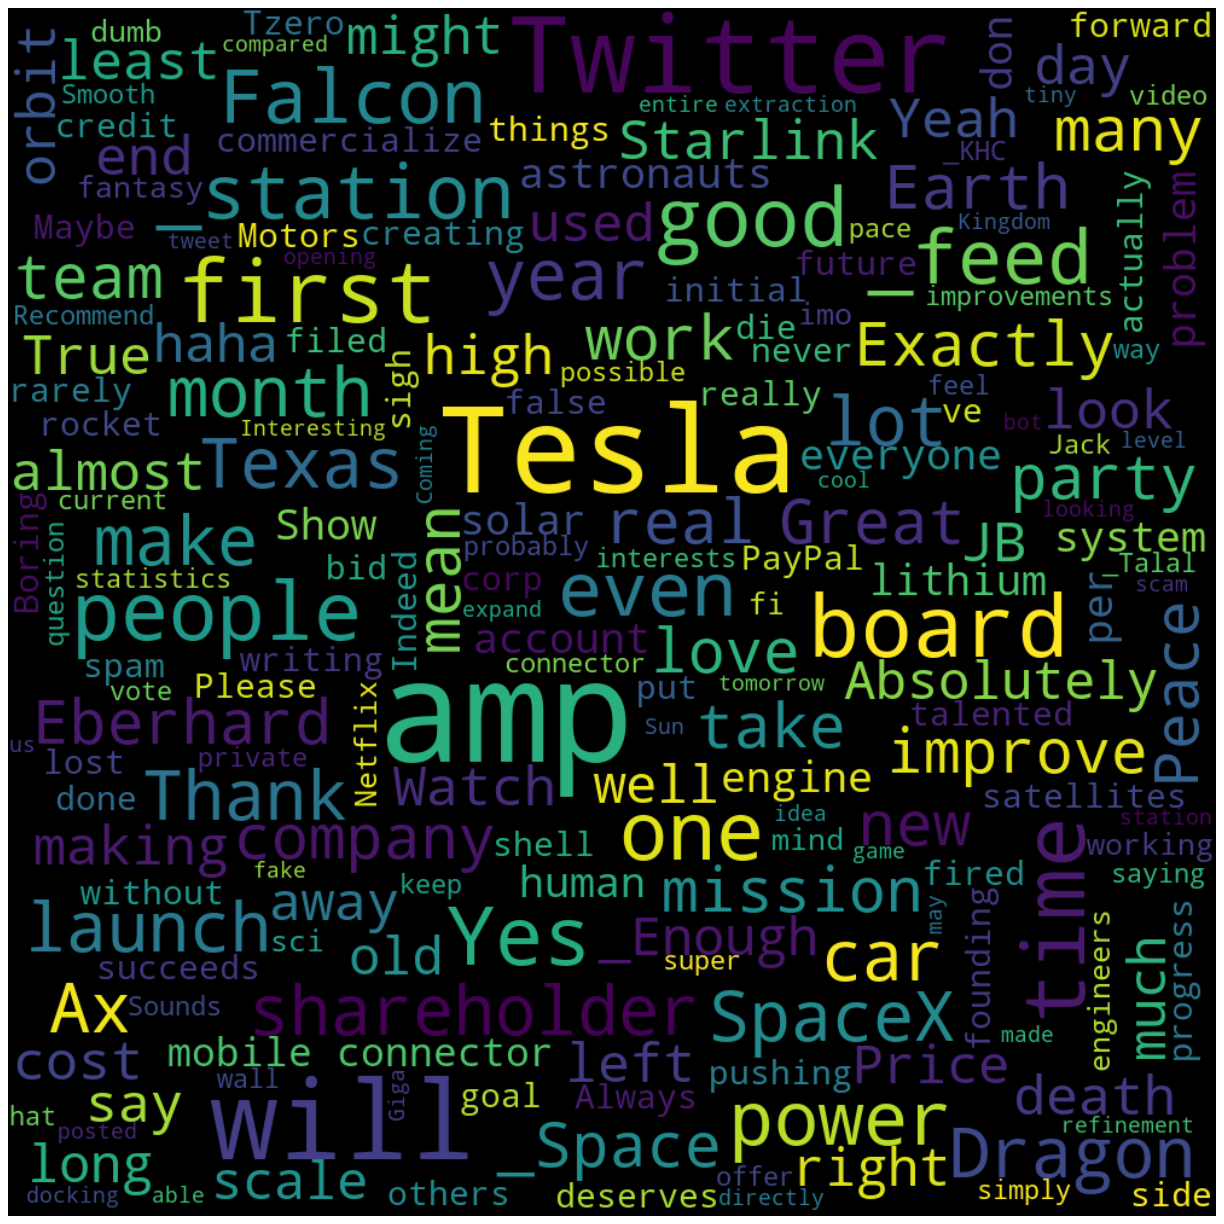

In [334]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df["tweet"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### **Analyze the Polarity of the tweet**

Polarity designs the neutral, positive and negative connotation of a text, but having that value as numeric can be confusing. Let’s catalog the data with a new column that defines the polarity ready to be consumed by users.

In [335]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,tweet,subjectivity,polarity,analysis
0,Yes,0.000000,0.000000,Neutral
1,🤣💯,0.000000,0.000000,Neutral
2,Believe in the future,0.125000,0.000000,Neutral
3,,0.000000,0.000000,Neutral
4,,0.000000,0.000000,Neutral
...,...,...,...,...
195,_feed He never had even one kid 😞,0.000000,0.000000,Neutral
196,Seriously. One of them might been Einstein!,0.666667,-0.416667,Negative
197,_kirsh _ Константи́н Циолко́вский,0.000000,0.000000,Neutral
198,,0.000000,0.000000,Neutral


Now, let’s extract some positive and negative tweets with the full text to see what they are all about.

In [336]:
positive_tweets = df[df['analysis'] == 'Positive']
negative_tweets = df[df['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['tweet'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['tweet'])

positive tweets
 - Tesla is really a dozen or more startups if you look at all the things created from scratch that aren’t present in other car companies
 -And authenticate all real humans
 -If our twitter bid succeeds, we will defeat the spam bots or die trying!
 -Such a joy to work with amazingly talented people at SpaceX, Tesla, Neuralink &amp; Boring Co!
 - _Diess Diess deserves a lot of credit for moving VW rapidly towards electrification. They’re lucky to have him.
negative tweets
 - Indeed (heavy sigh)
 - My true moral error was creating Tesla &amp; SpaceX at same time, while avoiding general mgmt chores at Tesla (focusing only on product &amp; engineering). Tried to have my cake &amp; eat it too, which failed.
 - Agreed. I wish JB &amp; I had just moved forward to commercialize the Tzero without adding other partners. In the end, that’s what happened anyway.
 -    I should, but that would take a lot of time away from Tesla, SpaceX &amp; other work. Walter Isaacson is writing a 

Let’s now try to find out if Elon’s tweets have more positive or negative connotations.

In [337]:
len(positive_tweets) / len(negative_tweets)

4.238095238095238

We can conclude that as the ratio is +ve, the overall tweets by user Elon Musk are positive in nature